# Public parks location in 6 Neighborhoods 

### Will be making a collective folium map from the 6 neighborhoods from our group project (Lincoln Heights) (Boyle Heights) (Los Feliz) (FairFax)(Jefferson Park) (West Lake) 

#### I added Geo pandas folium and matplotlib since i was looking at outside resource on some cool folium interactive maps that used these other imports and will try to mimic the code. I also used week 2 lecture as reference.

In [1]:
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

#### The data I am using is from the County of Los Angeles that has all the parks in Los Angeles County however before plugging in the csv file into Jupyter hub I had to clean the data. I deleted all the unnecessary data and left data that corresponds to the 6 neighborhoods zip codes while creating a new column naming it "Neighborhood". This will make my coding life easier. 

In [2]:
# read and add shapefile to notebook
Park = pd.read_csv("PublicSpace_All1.csv")

In [3]:
Park.tail()

,OBJECTID,UNIT_ID,LMS_ID,PARK_NAME,PARK_LBL,AGNCY_NAME,COGP_TYP,TYPE,CENTER_LAT,CENTER_LON,ADDRESS,CITY,ZIP,Shape__Area,Shape__Length,Neighborhood
73,987,6913,NaN,Griffith Park (City of Los Angeles),Griffith Park,"Los Angeles, City of",Regional Park,Regional Recreation Park,34.135473,-118.298554,Griffith Park Dr,Los Angeles,90027,1.771092e+08,199801.123700,Los Feliz
74,2279,45844,73967.0,Travel Town Museum,Travel Town Museum,"Los Angeles, City of",Not Analyzed,Natural Areas,34.154411,-118.307720,5200 Zoo Dr,Los Angeles,90027,4.522289e+05,2773.692026,Los Feliz
75,64,1365,22840.0,Hancock Park,Hancock Park,"Los Angeles, City of",Community Regional Park,Local Park,34.063730,-118.356890,5800 block of Wilshire Blvd,Los Angeles,90036,1.006459e+06,4124.406308,FairFax
76,1228,7622,71687.0,Pan Pacific Park,Pan Pacific Park,"Los Angeles, City of",Community Regional Park,Local Park,34.073334,-118.354985,7600 Beverly Blvd,Los Angeles,90036,1.140787e+06,6430.035279,FairFax
77,2889,46642,NaN,Rosewood Gardens Park,Rosewood Gardens Park,"Los Angeles, City of",Not Analyzed,Regional Open Space,34.080396,-118.361323,4160 1/2 Rosewood Ave,Los Angeles,90036,2.619516e+03,232.964070,FairFax


#### Making sure my data is working well So i wont have any trouble when plotting my map 

In [4]:
Park.tail(4)

,OBJECTID,UNIT_ID,LMS_ID,PARK_NAME,PARK_LBL,AGNCY_NAME,COGP_TYP,TYPE,CENTER_LAT,CENTER_LON,ADDRESS,CITY,ZIP,Shape__Area,Shape__Length,Neighborhood
74,2279,45844,73967.0,Travel Town Museum,Travel Town Museum,"Los Angeles, City of",Not Analyzed,Natural Areas,34.154411,-118.307720,5200 Zoo Dr,Los Angeles,90027,4.522289e+05,2773.692026,Los Feliz
75,64,1365,22840.0,Hancock Park,Hancock Park,"Los Angeles, City of",Community Regional Park,Local Park,34.063730,-118.356890,5800 block of Wilshire Blvd,Los Angeles,90036,1.006459e+06,4124.406308,FairFax
76,1228,7622,71687.0,Pan Pacific Park,Pan Pacific Park,"Los Angeles, City of",Community Regional Park,Local Park,34.073334,-118.354985,7600 Beverly Blvd,Los Angeles,90036,1.140787e+06,6430.035279,FairFax
77,2889,46642,NaN,Rosewood Gardens Park,Rosewood Gardens Park,"Los Angeles, City of",Not Analyzed,Regional Open Space,34.080396,-118.361323,4160 1/2 Rosewood Ave,Los Angeles,90036,2.619516e+03,232.964070,FairFax


#### Looking to see what type of data i have in my CVS 

In [5]:
Park.dtypes

OBJECTID           int64
UNIT_ID            int64
LMS_ID           float64
PARK_NAME         object
PARK_LBL          object
AGNCY_NAME        object
COGP_TYP          object
TYPE              object
CENTER_LAT       float64
CENTER_LON       float64
ADDRESS           object
CITY              object
ZIP                int64
Shape__Area      float64
Shape__Length    float64
Neighborhood      object
dtype: object

#### Looking at the imported data and see if I need to delete more columns but since i was able to cut data before I do not need to clean more data. So, we are good to proceed. 

In [6]:
# dataframe info
Park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       78 non-null     int64  
 1   UNIT_ID        78 non-null     int64  
 2   LMS_ID         51 non-null     float64
 3   PARK_NAME      78 non-null     object 
 4   PARK_LBL       78 non-null     object 
 5   AGNCY_NAME     78 non-null     object 
 6   COGP_TYP       78 non-null     object 
 7   TYPE           78 non-null     object 
 8   CENTER_LAT     78 non-null     float64
 9   CENTER_LON     78 non-null     float64
 10  ADDRESS        78 non-null     object 
 11  CITY           78 non-null     object 
 12  ZIP            78 non-null     int64  
 13  Shape__Area    78 non-null     float64
 14  Shape__Length  78 non-null     float64
 15  Neighborhood   78 non-null     object 
dtypes: float64(5), int64(3), object(8)
memory usage: 9.9+ KB


#### Looking at how many rows and columns this data set has

In [7]:
# how many rows and columns?
Park.shape

(78, 16)

#### Making sure I have my imported column list on my data to plot the public parks in this code

In [8]:
Park.columns.to_list()

['OBJECTID',
 'UNIT_ID',
 'LMS_ID',
 'PARK_NAME',
 'PARK_LBL',
 'AGNCY_NAME',
 'COGP_TYP',
 'TYPE',
 'CENTER_LAT',
 'CENTER_LON',
 'ADDRESS',
 'CITY',
 'ZIP',
 'Shape__Area',
 'Shape__Length',
 'Neighborhood']

#### Looking at the neighborhood sample data just again checking if my data is working well since i did some pre edits on the original data.

In [9]:
Park['Neighborhood'].sample(10) 

35           WestLake
62     Boyle Heights 
49           WestLake
30           WestLake
10    Lincoln Heights
73          Los Feliz
41           WestLake
68     Boyle Heights 
19    Lincoln Heights
66     Boyle Heights 
Name: Neighborhood, dtype: object

#### Looking at the value counts per public park of each neighborhood listed in the column "Neighborhood". I will be plotting this on a folium map. But before I can do that, I will need to create a new variable to plot by neighborhood. 

In [10]:
Park['Neighborhood'].value_counts()

WestLake           31
Lincoln Heights    19
Boyle Heights      14
Jefferson Park      8
Los Feliz           3
FairFax             3
Name: Neighborhood, dtype: int64

#### All right so I will make a new variable. Gonna name it PSN_Count short for Public Space Neighborhood Count. Doing this will make it easier to plot our folium map and do some graph charts with its corresponding names 

In [11]:
# Save this a new variable
# PPN_Count= Public Space Neighborhood

In [12]:
PSN_Count = Park['Neighborhood'].value_counts()
PSN_Count

WestLake           31
Lincoln Heights    19
Boyle Heights      14
Jefferson Park      8
Los Feliz           3
FairFax             3
Name: Neighborhood, dtype: int64

####

#### The "PSN_Count" is not in dataframe we will need to convert into DataFrame

In [13]:
PSN_Count

WestLake           31
Lincoln Heights    19
Boyle Heights      14
Jefferson Park      8
Los Feliz           3
FairFax             3
Name: Neighborhood, dtype: int64

In [14]:
type(PSN_Count)

pandas.core.series.Series

#### Converting PSN_Count into dataframe

In [15]:
# let's convert the series into a dataframe
PSN_Count = PSN_Count.reset_index()
PSN_Count

,index,Neighborhood
0,WestLake,31
1,Lincoln Heights,19
2,Boyle Heights,14
3,Jefferson Park,8
4,Los Feliz,3
5,FairFax,3


#### It Works cool !!

#### As we see above "index" and "Neighborhood" are not in the proper label. We will need to correct that by doing a quick edit using the columns.to_list() to edit the output of the format. 

In [16]:
# current columns as a list
PSN_Count.columns.to_list()

['index', 'Neighborhood']

#### Using the output of line 21 code we will change "Index" With "Neighborhood" and "Neighborhood" with "Count" 
#### Counts is the number of parks in each Neighborhood

In [20]:
# current columns as a list
PSN_Count.columns = ['Neighborhood', 'Count']

#### The values are changed and should look better to read

In [21]:
PSN_Count

,Neighborhood,Count
0,WestLake,31
1,Lincoln Heights,19
2,Boyle Heights,14
3,Jefferson Park,8
4,Los Feliz,3
5,FairFax,3


#### It looks better 

<AxesSubplot: >

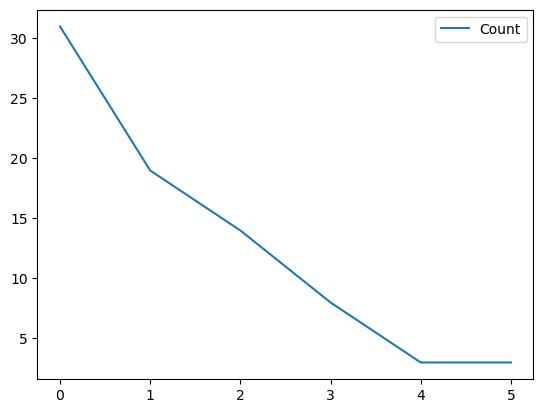

In [ ]:
PSN_Count.plot()

#### Just Wanted to plot just for fun even though this is a bad plot graph 

#### All right this is a better graph with number of parks  per Neighborhood

<AxesSubplot: title={'center': 'Number of parks per Neighborhood'}, xlabel='Neighborhood'>

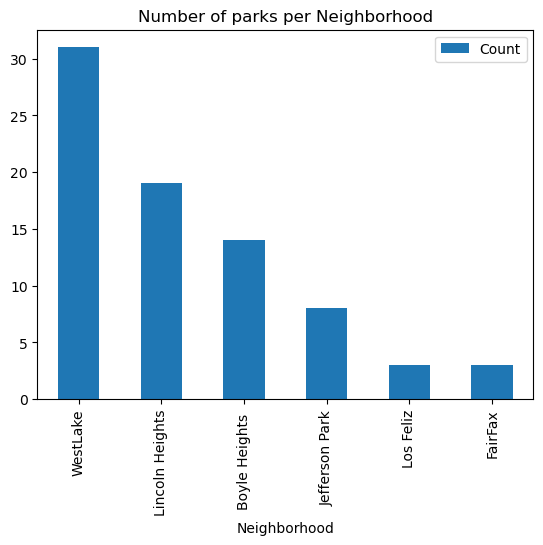

In [22]:
# give it additional arguments
PSN_Count.plot.bar(x = 'Neighborhood', y = 'Count', title = 'Number of parks per Neighborhood')

#### This is cool huh more like beginner code :{ <-Sad face  

#### I also wanted to do this to make sure my data is working because i can now see that if I plot this in a folium map it can work by neighborhood 

#### im going to keep 6 columns that i need to plot my folium map.

In [ ]:
# Keeping 6 varibales to map our folium map

In [23]:
Park_p = Park.loc[:, ("PARK_NAME","Neighborhood","CITY","CENTER_LAT", "CENTER_LON", "TYPE",)]
Park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       78 non-null     int64  
 1   UNIT_ID        78 non-null     int64  
 2   LMS_ID         51 non-null     float64
 3   PARK_NAME      78 non-null     object 
 4   PARK_LBL       78 non-null     object 
 5   AGNCY_NAME     78 non-null     object 
 6   COGP_TYP       78 non-null     object 
 7   TYPE           78 non-null     object 
 8   CENTER_LAT     78 non-null     float64
 9   CENTER_LON     78 non-null     float64
 10  ADDRESS        78 non-null     object 
 11  CITY           78 non-null     object 
 12  ZIP            78 non-null     int64  
 13  Shape__Area    78 non-null     float64
 14  Shape__Length  78 non-null     float64
 15  Neighborhood   78 non-null     object 
dtypes: float64(5), int64(3), object(8)
memory usage: 9.9+ KB


#### Gonna need to create a Geomerty to plot with folium map using the Lon and LAT and the 6 other columns

In [24]:
geometry = geopandas.points_from_xy(Park_p.CENTER_LON, Park_p.CENTER_LAT)
PSN = geopandas.GeoDataFrame(
    Park_p[["PARK_NAME","Neighborhood","CITY","CENTER_LAT", "CENTER_LON", "TYPE"]], geometry=geometry
)
PSN.head()

,PARK_NAME,Neighborhood,CITY,CENTER_LAT,CENTER_LON,TYPE,geometry
0,Leslie N. Shaw Park,Jefferson Park,Los Angeles,34.025852,-118.319803,Local Park,POINT (-118.31980 34.02585)
1,Loren Miller Park,Jefferson Park,Los Angeles,34.030323,-118.303423,Local Park,POINT (-118.30342 34.03032)
2,Benny H. Potter West Adams Ave Memorial Park,Jefferson Park,Los Angeles,34.034892,-118.319179,Local Park,POINT (-118.31918 34.03489)
3,Denker Rec. Center,Jefferson Park,Los Angeles,34.023229,-118.303595,Local Park,POINT (-118.30360 34.02323)
4,Gramercy Park,Jefferson Park,Los Angeles,34.033920,-118.312403,Regional Open Space,POINT (-118.31240 34.03392)


#### Check it out it worked 

#### Let's plot a map using the coordinates from Los Angeles so when I open a street map it will take us to Los Angeles 

In [27]:
map = folium.Map(location=[34.05349, -118.24532], tiles="Openstreetmap", zoom_start=12)
map

#### Plotting the data without a folium just to see some data scattered 

<AxesSubplot: >

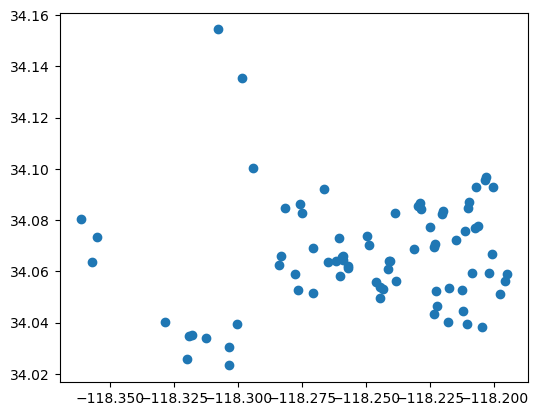

In [28]:
PSN.plot()

#### So remember how we made a geometry cloumn i am just making sure its working so when polotting our Neighborhood column will see some plots on a map

In [30]:
PSN.geometry

0     POINT (-118.31980 34.02585)
1     POINT (-118.30342 34.03032)
2     POINT (-118.31918 34.03489)
3     POINT (-118.30360 34.02323)
4     POINT (-118.31240 34.03392)
                 ...             
73    POINT (-118.29855 34.13547)
74    POINT (-118.30772 34.15441)
75    POINT (-118.35689 34.06373)
76    POINT (-118.35498 34.07333)
77    POINT (-118.36132 34.08040)
Name: geometry, Length: 78, dtype: geometry

#### Ploting the PSN data but only using the column "Neighborhood" to only plot the parks per neighborhood. 

<AxesSubplot: >

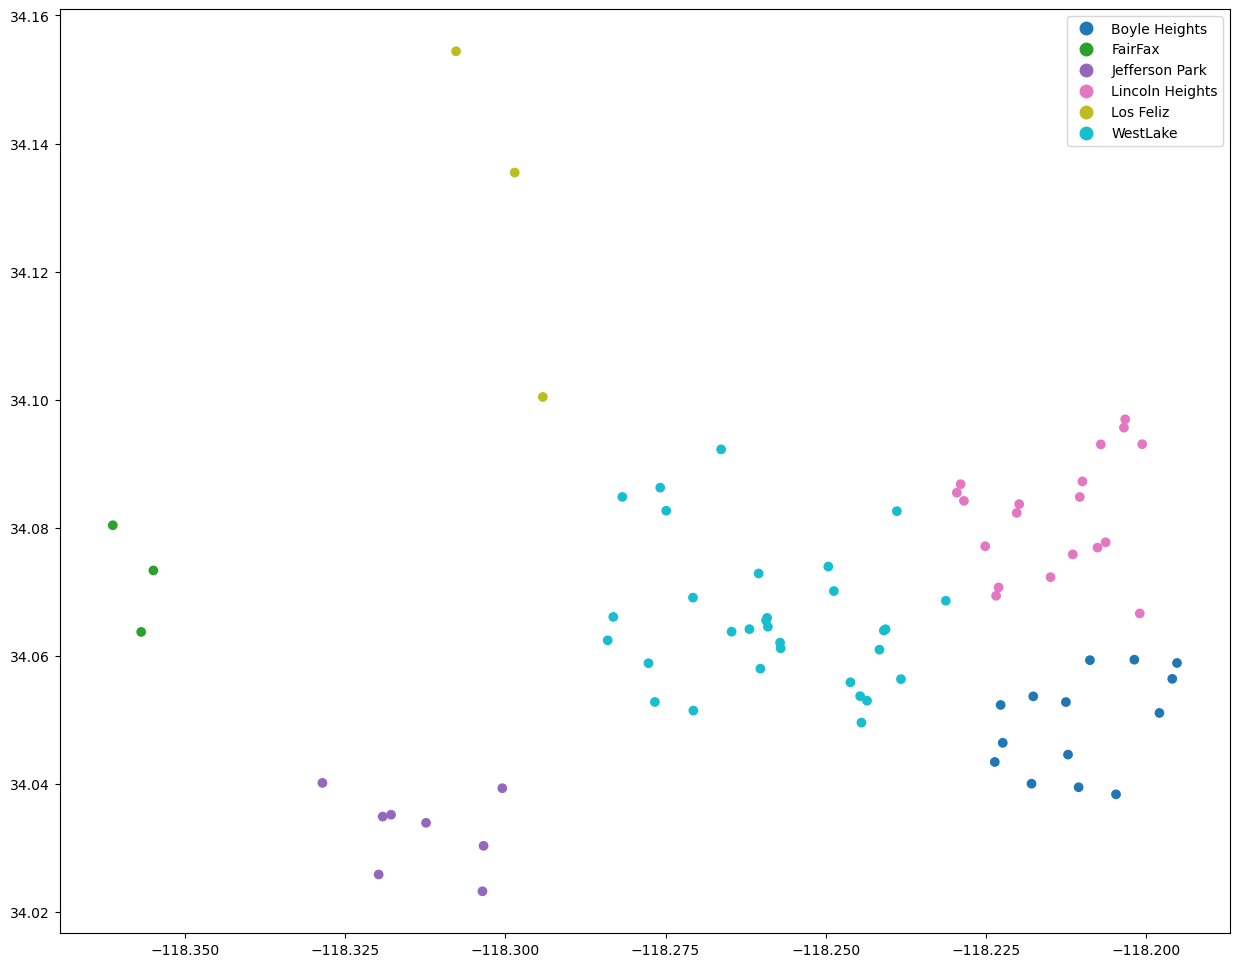

In [31]:
PSN.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'Neighborhood',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

#### Beautiful plot graph by Neighborhood Park
#### Now lets add a folium map behind that. 

#### Alright lets make a a folium map with the Neighborhood park data. 

In [32]:
import folium

m = folium.Map(location=[34.05349, -118.24532])

#### Added the Los Angeles Coordinates into the folium map and named the map m 

#### loop through a dataframe per neighborhood and parks with its LON and LON 

In [34]:
# first, note how to loop through a dataframe:
for index, row in PSN.iterrows():
    print(row.Neighborhood, row.CENTER_LAT, row.CENTER_LON)

Jefferson Park 34.0258515 -118.3198034
Jefferson Park 34.03032272 -118.3034231
Jefferson Park 34.03489201 -118.3191787
Jefferson Park 34.02322909 -118.303595
Jefferson Park 34.03392003 -118.3124031
Jefferson Park 34.04015351 -118.328585
Jefferson Park 34.03932392 -118.3004936
Jefferson Park 34.03518485 -118.3178673
Lincoln Heights 34.07228703 -118.2148714
Lincoln Heights 34.09301892 -118.2070222
Lincoln Heights 34.06662121 -118.2009429
Lincoln Heights 34.09563521 -118.2034178
Lincoln Heights 34.08680192 -118.2289197
Lincoln Heights 34.08419639 -118.2284029
Lincoln Heights 34.08547196 -118.2295154
Lincoln Heights 34.07068537 -118.2229882
Lincoln Heights 34.08723143 -118.209897
Lincoln Heights 34.09304819 -118.2005637
Lincoln Heights 34.07772191 -118.2062768
Lincoln Heights 34.08369292 -118.2197717
Lincoln Heights 34.0693831 -118.2233846
Lincoln Heights 34.07711477 -118.2250809
Lincoln Heights 34.07689801 -118.207543
Lincoln Heights 34.08232159 -118.2201563
Lincoln Heights 34.07584242 -1

#### Now lets import our neighborhood map into our Folium map

In [35]:
for index, row in PSN.iterrows():
    # add folium marker code
    folium.Marker([row.CENTER_LAT, row.CENTER_LON], popup=row.Neighborhood, tooltip=row.Neighborhood).add_to(m)
m

#### The parks are not coming out with its unique color so lets make a new column to color code the Neighborhood

In [37]:
# add a new column
PSN['color'] = ''

#### Add color to parks by neighborhood

In [ ]:
PSN.head()

,PARK_NAME,Neighborhood,CITY,CENTER_LAT,CENTER_LON,TYPE,geometry,color
0,Leslie N. Shaw Park,Jefferson Park,Los Angeles,34.025852,-118.319803,Local Park,POINT (-118.31980 34.02585),
1,Loren Miller Park,Jefferson Park,Los Angeles,34.030323,-118.303423,Local Park,POINT (-118.30342 34.03032),
2,Benny H. Potter West Adams Ave Memorial Park,Jefferson Park,Los Angeles,34.034892,-118.319179,Local Park,POINT (-118.31918 34.03489),
3,Denker Rec. Center,Jefferson Park,Los Angeles,34.023229,-118.303595,Local Park,POINT (-118.30360 34.02323),
4,Gramercy Park,Jefferson Park,Los Angeles,34.033920,-118.312403,Regional Open Space,POINT (-118.31240 34.03392),


#### Look at our new column "COLOR" will add 6 different color per neighborhood

In [43]:
# find unique values in the Neighborhood column
PSN.Neighborhood.unique()

array(['Jefferson Park', 'Lincoln Heights', 'WestLake', 'Boyle Heights ',
       'Los Feliz', 'FairFax'], dtype=object)

#### The Unique values will use in our code to color code it 

#### Looking at the Neighborhood with its one unique value

In [44]:
# display rows that match a query
PSN.loc[PSN['Neighborhood'] == 'Lincoln Heights']

,PARK_NAME,Neighborhood,CITY,CENTER_LAT,CENTER_LON,TYPE,geometry,color
8,Lincoln Heights Rec. Center,Lincoln Heights,Los Angeles,34.072287,-118.214871,Local Park,POINT (-118.21487 34.07229),
9,Charles F. Lummis Home,Lincoln Heights,Los Angeles,34.093019,-118.207022,Natural Areas,POINT (-118.20702 34.09302),
10,Lincoln Park (City of Los Angeles),Lincoln Heights,Los Angeles,34.066621,-118.200943,Local Park,POINT (-118.20094 34.06662),
11,Arroyo Seco,Lincoln Heights,Los Angeles,34.095635,-118.203418,Natural Areas,POINT (-118.20342 34.09564),
12,Steelhead Park,Lincoln Heights,Los Angeles,34.086802,-118.228920,Local Park,POINT (-118.22892 34.08680),
13,Egret Park,Lincoln Heights,Los Angeles,34.084196,-118.228403,Local Park,POINT (-118.22840 34.08420),
14,Oso Park,Lincoln Heights,Los Angeles,34.085472,-118.229515,Local Park,POINT (-118.22952 34.08547),
15,Downey Playground and Rec. Center,Lincoln Heights,Los Angeles,34.070685,-118.222988,Local Park,POINT (-118.22299 34.07069),
16,Heritage Square,Lincoln Heights,Los Angeles,34.087231,-118.209897,Regional Open Space,POINT (-118.20990 34.08723),
17,Montecito Heights Open Space,Lincoln Heights,Los Angeles,34.093048,-118.200564,Natural Areas,POINT (-118.20056 34.09305),


#### Notice how we dont have a color designated in our data well lets add one

In [45]:
PSN.loc[PSN['Neighborhood'] == 'Lincoln Heights','color'] = 'orange'

#### Lets check if our code for the color code wroked 

In [47]:
PSN.loc[PSN['Neighborhood'] == 'Lincoln Heights']

,PARK_NAME,Neighborhood,CITY,CENTER_LAT,CENTER_LON,TYPE,geometry,color
8,Lincoln Heights Rec. Center,Lincoln Heights,Los Angeles,34.072287,-118.214871,Local Park,POINT (-118.21487 34.07229),orange
9,Charles F. Lummis Home,Lincoln Heights,Los Angeles,34.093019,-118.207022,Natural Areas,POINT (-118.20702 34.09302),orange
10,Lincoln Park (City of Los Angeles),Lincoln Heights,Los Angeles,34.066621,-118.200943,Local Park,POINT (-118.20094 34.06662),orange
11,Arroyo Seco,Lincoln Heights,Los Angeles,34.095635,-118.203418,Natural Areas,POINT (-118.20342 34.09564),orange
12,Steelhead Park,Lincoln Heights,Los Angeles,34.086802,-118.228920,Local Park,POINT (-118.22892 34.08680),orange
13,Egret Park,Lincoln Heights,Los Angeles,34.084196,-118.228403,Local Park,POINT (-118.22840 34.08420),orange
14,Oso Park,Lincoln Heights,Los Angeles,34.085472,-118.229515,Local Park,POINT (-118.22952 34.08547),orange
15,Downey Playground and Rec. Center,Lincoln Heights,Los Angeles,34.070685,-118.222988,Local Park,POINT (-118.22299 34.07069),orange
16,Heritage Square,Lincoln Heights,Los Angeles,34.087231,-118.209897,Regional Open Space,POINT (-118.20990 34.08723),orange
17,Montecito Heights Open Space,Lincoln Heights,Los Angeles,34.093048,-118.200564,Natural Areas,POINT (-118.20056 34.09305),orange


#### Now lets do the same for the rest and Neighborhood data and color code them individualy  

In [48]:
PSN.loc[PSN['Neighborhood'] == 'Jefferson Park', 'color'] = 'purple'
PSN.loc[PSN['Neighborhood'] == 'WestLake', 'color'] = 'blue'
PSN.loc[PSN['Neighborhood'] == 'Boyle Heights', 'color'] = 'red'
PSN.loc[PSN['Neighborhood'] == 'Los Feliz', 'color'] = 'green'
PSN.loc[PSN['Neighborhood'] == 'FairFax', 'color'] = 'beige'

#### The final result lets see if it worked

In [50]:
# add the Neighborhoodparks with color icons
for index, row in PSN.iterrows():
    tooltip_text = row.PARK_NAME + ' PARK_NAME: ' + row.Neighborhood
    folium.Marker(
        [row.CENTER_LAT,row.CENTER_LON], 
        popup=row.Neighborhood, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m)

# show the map
m

/tmp/ipykernel_927/3834801417.py:8: UserWarning: color argument of Icon should be one of: {'blue', 'darkred', 'beige', 'orange', 'lightgray', 'lightblue', 'darkpurple', 'purple', 'darkgreen', 'cadetblue', 'lightgreen', 'darkblue', 'red', 'lightred', 'black', 'pink', 'gray', 'green', 'white'}.
  icon=folium.Icon(color=row.color)


#### Our code worked we now have a color code per neighborhood park 